<a href="https://colab.research.google.com/github/sonudk/Introduction_to_AI_and_IoT-/blob/master/linearData_gradDescent_sine_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

Train the model using gradient descent algorithm.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    ### BEGIN SOLUTION
    y = np.sin(x)
    ### END SOLUTION
    return y

In [0]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    ### BEGIN SOLUTION
    x = np.random.random(N)*2*np.pi
    yd = fx(x)
    ### END SOLUTION
    return x, yd

In [0]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

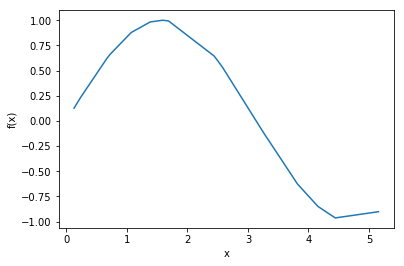

In [0]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>



In [0]:
def createA(x, D):
    '''
    Create the vector A with degree D
    Input:
        x: a single scalar
        D: degree of the model
    Output:
        A: vector of length D+1
    '''
    ### BEGIN SOLUTION
    A = np.ones(D+1)
    for d in range(1,D+1): # skipping d=0
        A[d] = np.power(x,d)/np.power(2*np.pi,d)  # << note here: data normalization
    ### END SOLUTION
    return A

### Initialize Weights

In [0]:
def init_w(D):
    '''
    Inputs:
        D: int; the degree of the model
    Output:
        w: np vector of shape (D+1,), initialized randomly to small values in (-1,1)
    '''
    ### BEGIN SOLUTION
    w = (2*np.random.random(D+1,)-1) 
    ### END SOLUTION
    return w

### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: a single scalar
    Outputs:
        yhat: a single scalar; y=Aw
    '''
    ### BEGIN SOLUTION
    D = w.shape[0]-1
    A = createA(x, D)
    yhat = A.dot(w)
    ### END SOLUTION
    return yhat

## Training
We will now define a linear model to estimate the above function, and train it with all the data. Estimate w from yd and x. Use the grdient descent method you learnt in the video

### Estimate Error
Find E as the mean squared error

In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        yhat: a scalar; yhat=Aw
        yd: a scalar; yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    ### BEGIN SOLUTION
    mse = (y-yd)*(y-yd)
    ### END SOLUTION
    return mse

In [0]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1])
    y = np.array([.8])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Estimate gradients

In [0]:
def calc_dw(x, yhat, y, D):
    '''
    Inputs:
        x: scalar
        yhat: scalar; yhat = Aw
        y: scalar; y = f(x)
    Outputs:
        dw: np vector of shape (D+1,) 
    '''
    dw = np.zeros(D+1,)
    com = -2*(y-yhat)
    dw[0] += com
    for d in range(1,D+1):
        dw[d] += com * np.power(x,d)/np.power(2*np.pi,d) # << note here: data normalization

    return dw

In [0]:
def update_w(w, dw, eta):
    w -= (dw * eta)
    return w

In [0]:
def train_w(x, yd, w, Nepoch, eta):
    '''
    Inputs:
        x: np vector of shape (N,)
        yd: np vector of shape (N,); y = f(x)
        w: np vector of shape (D+1,)
        Nepoch: int, Number of epochs to be run
    Outputs:
    '''
    N = x.shape[0]
    D = w.shape[0]-1
    for epoch in range(Nepoch):
        for s in range(N):
            yhat = predict_y(w, x[s])
            dw = calc_dw(x[s], yhat, yd[s], D)
            w = update_w(w, dw, eta)            
    return w

### Plotting


In [0]:
def plotModel(x, y, yd, title='',xlim=[0,7]):
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.xlim(xlim)
    plt.title(title)

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    ### BEGIN SOLUTION
    x, yd = generateX_fx(N)
    w = init_w(D)
    Nepoch=1000
    eta = 0.1
    w = train_w(x, yd, w, Nepoch, eta)
    mse = 0 
    y=[]
    for s in range(N):
        y.append(predict_y(w, x[s]))
        mse += compute_mse(y[s], yd[s])
    mse = mse/N
    y = np.array(y)
    ### END SOLUTION
    return x, y, yd, w, mse


## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    ### BEGIN SOLUTION
    x, yd = generateX_fx(Ntest)
    D = w.shape[0]-1
    y=[]
    mse = 0
    for s in range(Ntest):
        y.append(predict_y(w, x[s]))
        mse += compute_mse(y[s], yd[s])
    mse = mse/Ntest
    y = np.array(y)
    ### END SOLUTION
    return x, y, yd, mse

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

N=3; D=5
MSE on train data =  0.017449733107742473
MSE on test data =  0.2568744990546363
N=5; D=5
MSE on train data =  0.0019824351428060186
MSE on test data =  0.22111629909554412
N=10; D=5
MSE on train data =  0.0019235932039976054
MSE on test data =  0.6205342568934159
N=30; D=5
MSE on train data =  0.019187849510733008
MSE on test data =  0.03235331693119834


Text(0, 0.5, 'MSE')

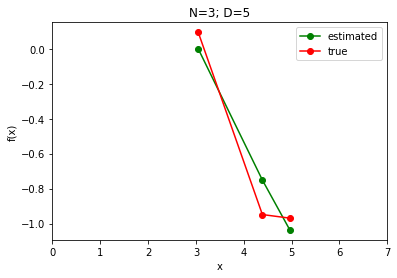

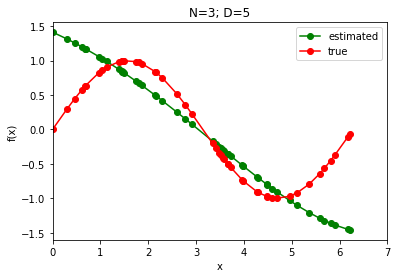

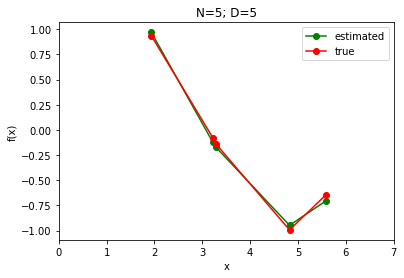

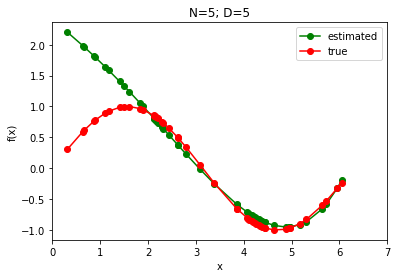

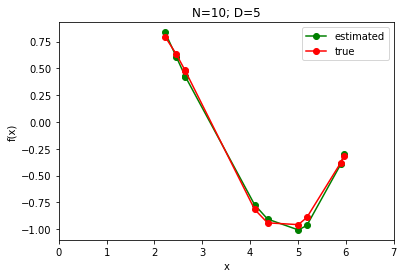

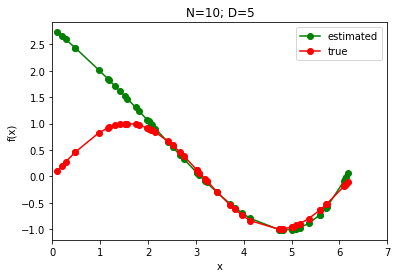

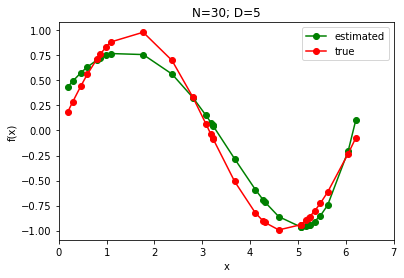

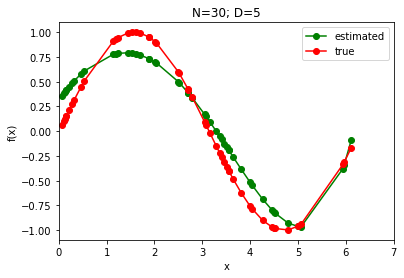

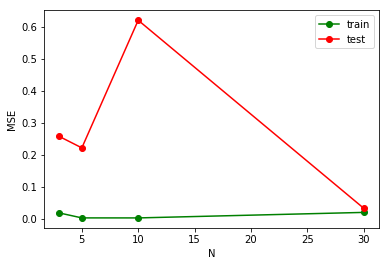

In [0]:
D = 5
MSE_train = []
MSE_test = []
N_all = [3,5,10,30]
for N in N_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(mse)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(mse)
  print('MSE on test data = ', mse)
  plotModel(x,y,yd,title)
plt.figure()
plt.plot(N_all, MSE_train,'go-')
plt.plot(N_all, MSE_test, 'ro-')
plt.legend(['train','test'])
plt.xlabel('N')
plt.ylabel('MSE')

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

N=10; D=0
MSE on train data =  0.3831216280612329
MSE on test data =  0.5347042157884462
N=10; D=1
MSE on train data =  0.06316811560868958
MSE on test data =  0.39304379137500894
N=10; D=2
MSE on train data =  0.05093691343787458
MSE on test data =  0.2809009644943681
N=10; D=4
MSE on train data =  0.03433989025545481
MSE on test data =  0.22107022266302873
N=10; D=7
MSE on train data =  0.0257936766345096
MSE on test data =  1.3919888334866746
N=10; D=12
MSE on train data =  0.016608157600697667
MSE on test data =  1.0079470459551276


Text(0, 0.5, 'MSE')

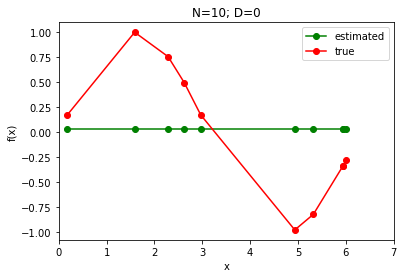

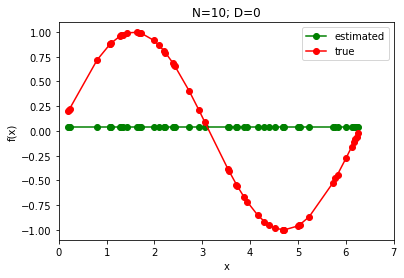

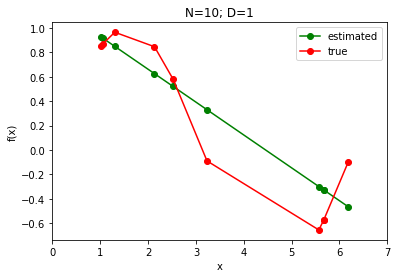

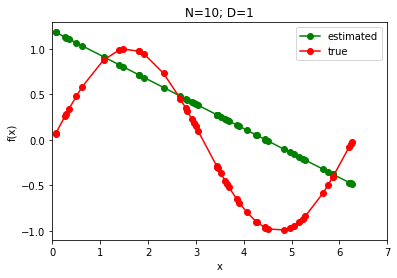

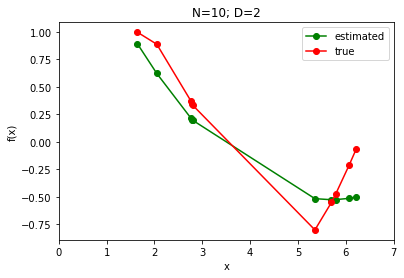

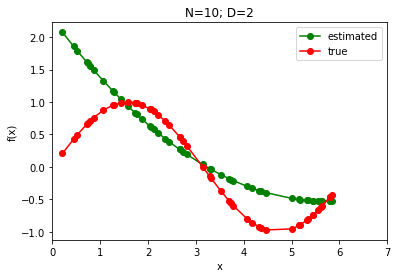

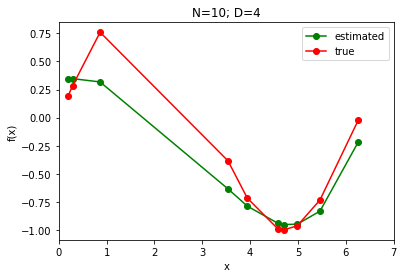

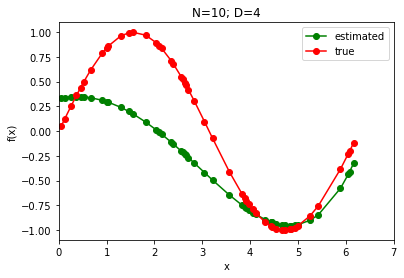

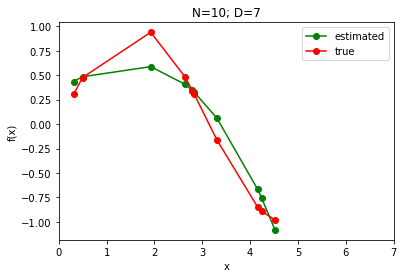

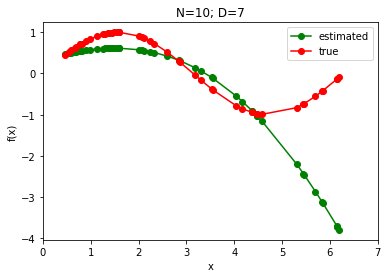

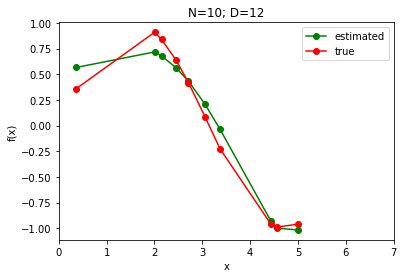

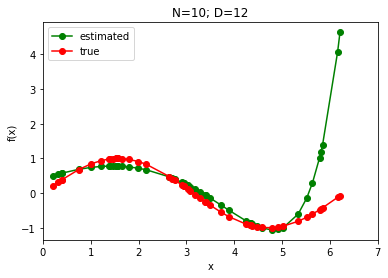

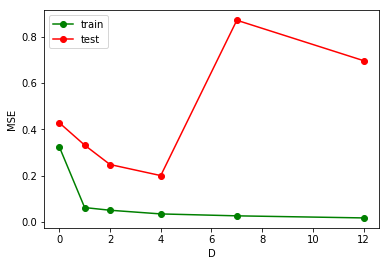

In [0]:
N=10
MSE_train = []
MSE_test = []
D_all = [0,1,2,4,7,12]
for D in D_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(mse)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(mse)
  print('MSE on test data = ', mse)
  plotModel(x,y,yd,title)
plt.figure()
MSE_train = np.array(MSE_train)
plt.plot(D_all, np.log(MSE_train+1),'go-')
MSE_test = np.array(MSE_test)
plt.plot(D_all, np.log(MSE_test+1), 'ro-')
plt.legend(['train','test'])
plt.xlabel('D')
plt.ylabel('MSE')